## Модель

Используется следующая формула:

Coins = a*Q*exp(-d*Q) + b

где Coins - количество токенов, а Q - качество.

Для поиска коэффициентов используются две известные точки, а именно начальная точка и точка окончательной эмиссии всех токенов (берется условно 5 лет до этого момента).

Параметры модели:


In [12]:
import numpy as np

Q0 = 0.3 #качество в первой точке
Qmax = 5 #качество во второй точке
TotalCoins = 1000000000 #общая эмиссия
Coins0 = 100000000 #эмиссия в начальной точке

Рассчитываем параметры модели:

In [32]:



b = Coins0

a=0

d=0

def calccoeff(CoinsSt,Qst,Qmax,CoinsMax):
    if CoinsSt==b:
        part1 = CoinsSt/Qst
    else:
        part1=(CoinsSt-b)/Qst
    part2 = (CoinsMax - CoinsSt)/Qmax
    part3 = part2/part1
    part4=np.log(part3)
    d=part4/(Qst-Qmax)
    part5=np.exp((-1)*d*Qmax)*Qmax
    a=(CoinsMax-b)/part5
    return (a,d)
    

(a,d)=calccoeff(b,Q0,Qmax,TotalCoins)

print("d:"+str(d))

print("a:"+str(a))


d:0.1311034339199611
a:346704912.0107226


Теперь мы можем рассчитать эмиссию для любого качества, например, для первого квартала (Q = 1)

In [35]:
def emission(q,a,d,b):
    return a*q*np.exp((-1)*d*q)+b

Q1=1

EmQ1=emission(Q1,a,d,b)

print("Эмиссия: "+str(EmQ1))

Эмиссия: 404104254.9625237


Построим базовый график эмиссии, исходя из текущей модели:

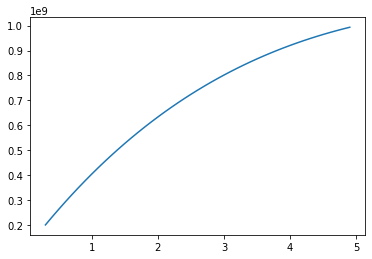

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

x=np.arange(Q0,Qmax,0.1)

y=[]

for i in x:
    y.append(emission(i,a,d,b))

plt.plot(x,y)



Попробуем изменить формулу, чтобы внести анлок. Для этого введем следующее предположение:
при анлоке в момент, когда он происходит, качество падает пропорционально количеству анлокнутых койнов
(т.е. в зависимости от того, какой процент анлочится)

Для приблизительного подсчета возьмем следующие переменные: первый квартал после запуска (Q=1.3), 10%


In [25]:
Qunlock=1.3

Unlock=0.1

Qu=emission(Qunlock)

CoinsUnlock=Qu*(1-Unlock)

print("Coins after unlock:"+str(CoinsUnlock))

Coins after unlock:432079547.5540199


Воспользуемся этим для пересчета коэффициентов, считая их теми же до момента анлока и изменившимися после:

In [34]:
(aunl,dunl)=calccoeff(CoinsUnlock,Qunlock,Qmax,TotalCoins)

print("a (unlock): "+str(aunl)+", d (unlock):"+str(dunl))

a (unlock): 538174197.6878573, d (unlock):0.21904508887752086


Построим новый график:

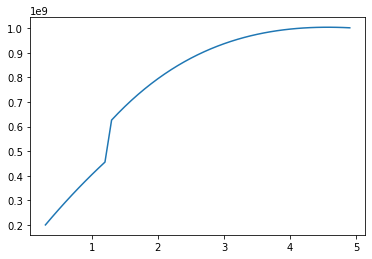

In [37]:
x=np.arange(Q0,Qmax,0.1)

y=[]

for i in x:
    if i<Qunlock:
        y.append(emission(i,a,d,b))
    else:
        y.append(emission(i,aunl,dunl,b))
        

plt.plot(x,y)